Import all the necessary libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases 
# To deal with encodings issues with different encoding types
# the matplotlib plots will appear directly below the cell in which the plot function was called
%matplotlib inline

In [105]:
# To find where my file should be located
import os
os.getcwd()

'/Users/yiching/Desktop/Python Data Analysis'

In [106]:
# To find encodings that work
# Below line creates a set of all available encodings
alias_values=set(aliases.values())
for encoding in alias_values:
    try:
        df=pd.read_csv("crime.csv", nrows=10, encoding=encoding)
        print("successful", encoding)
    except:
        pass

successful cp862
successful iso8859_11
successful cp775
successful utf_16_be
successful iso8859_5
successful cp861
successful cp037
successful cp857
successful mac_turkish
successful hp_roman8
successful cp865
successful cp437
successful mac_cyrillic
successful mac_roman
successful cp949
successful cp858
successful gbk
successful cp1026
successful iso8859_16
successful cp1255
successful mac_iceland
successful cp1140
successful cp852
successful cp1250
successful iso8859_15
successful cp932
successful cp1254
successful ptcp154
successful cp500
successful iso8859_13
successful iso8859_4
successful iso8859_6
successful cp863
successful iso8859_7
successful cp866
successful cp1251
successful iso8859_3
successful kz1048
successful cp1252
successful cp1253
successful iso8859_2
successful cp1257
successful mac_greek
successful iso8859_9
successful latin_1
successful big5hkscs
successful cp864
successful mac_latin2
successful gb18030
successful cp1125
successful iso8859_10
successful cp273
succ

In [107]:
crime=pd.read_csv("crime.csv", encoding="iso8859_15")

In [108]:
crime.head() # Quick check on how the dataset looks like

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [109]:
crime.shape # 319,073 rows & 17 columns

(319073, 17)

In [110]:
# Counting the duplicated "rows"
crime.duplicated().sum()

23

In [111]:
crime.drop_duplicates(inplace=True) # makes your change permanent

In [113]:
crime.shape

(319050, 17)

Explore the dataset

In [114]:
crime.head() # Quick check of the beginning of the dataframe

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [29]:
crime.tail() # Quick check of the end of the dataframe

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [32]:
pd.options.display.max_rows=6

In [ ]:
crime # By default, pandas will give 10 rows

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [36]:
crime.info() # Summary information about the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [ ]:
# Changing the data type from object to datetime for the OCCURRED_ON_DATE column 
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [ ]:
# Check if it worked 
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET             

In [ ]:
# easily extract datetime information from the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE.dt.year

0         2018
1         2018
2         2018
          ... 
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [40]:
crime.OCCURRED_ON_DATE.dt.month

0         9
1         8
2         9
         ..
319070    7
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [42]:
crime.OCCURRED_ON_DATE.dt.isocalendar().week

0         35
1         34
2         36
          ..
319070    28
319071    22
319072    26
Name: week, Length: 319050, dtype: UInt32

In [43]:
crime.OCCURRED_ON_DATE.dt.hour

0         13
1          0
2         19
          ..
319070    13
319071    19
319072     0
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [44]:
crime.OCCURRED_ON_DATE.dt.minute

0          0
1          0
2         27
          ..
319070    38
319071    35
319072    12
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [45]:
crime.describe() # Summary information on the numeric columns

,OFFENSE_CODE,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2017-01-25 12:35:59.149211904,2016.560674,6.609622,13.118176,42.214373,-70.908260
min,111.000000,2015-06-15 00:00:00,2015.000000,1.000000,0.000000,-1.000000,-71.178674
...,...,...,...,...,...,...,...
75%,3201.000000,2017-11-05 18:39:00,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018-09-03 21:25:00,2018.000000,12.000000,23.000000,42.395042,-1.000000
std,1185.308921,NaN,0.996312,3.273677,6.294258,2.159845,3.493746


In [47]:
crime.describe(include="object") # Summary information on the non-numeric columns

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [ ]:
# Print out all the columns' names
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [ ]:
# Below line creates a Series 
np.sum(crime.isnull())

In [ ]:
# Checking for columns with mssing values
crime.columns[np.sum(crime.isnull()) != 0] # True = 1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [121]:
# Checking for the number of missing values in each column
print("Missing values in each column \n")
crime[crime.columns].isnull().sum()

Missing values in each column 



INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP        0
                      ...  
Lat                   19998
Long                  19998
Location                  0
Length: 17, dtype: int64

In [ ]:
# Checking for columns without missing values
crime.columns[np.sum(crime.isnull()) == 0]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [119]:
# Checking for the number of unique values in each column 
for col in crime.columns:
    unique_count=crime[col].nunique()
    # print(col + " has " + str(unique_count) + " unique values ")
    print(f"{col} has {unique_count} unique values")

INCIDENT_NUMBER has 282517 unique values
OFFENSE_CODE has 222 unique values
OFFENSE_CODE_GROUP has 67 unique values
OFFENSE_DESCRIPTION has 244 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 879 unique values
SHOOTING has 1 unique values
OCCURRED_ON_DATE has 233229 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 4657 unique values
Lat has 18178 unique values
Long has 18178 unique values
Location has 18194 unique values


Let's answer some questions

In [ ]:
# What are the most common crimes in terms of offense group?
crime.OFFENSE_CODE_GROUP.value_counts()
# value__counts() counts the unique values under column "OFFENSE_CODE_GROUP"

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
                                             ...  
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: count, Length: 67, dtype: int64

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
                                     ...   
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: count, Length: 10, dtype: float64

Text(0.5, 1.0, 'Top 10 Offense Groups (as % of all crimes)')

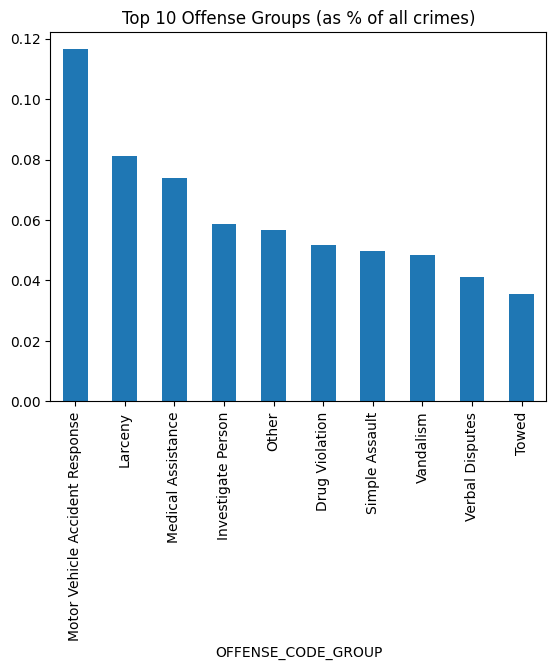

In [ ]:
offense_group_vals=crime.OFFENSE_CODE_GROUP.value_counts()[:10]
# offense_group_vals
display(offense_group_vals/crime.shape[0]) 

# Creating a bar chart of the Top 10 offense groups
(offense_group_vals/crime.shape[0]).plot(kind="bar")
plt.title("Top 10 Offense Groups (as % of all crimes)")


In [78]:
# What are the least common offense groups?
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

OFFENSE_CODE_GROUP
Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
                                             ..
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: count, Length: 10, dtype: int64

In [ ]:
# What are the most common offense descriptions?
crime.OFFENSE_DESCRIPTION.value_counts()

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18753
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
                                               ...  
DRUGS - GLUE INHALATION                            1
ROBBERY - KNIFE - STREET                           1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: count, Length: 244, dtype: int64

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            0.058872
INVESTIGATE PERSON                       0.058778
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051161
                                           ...   
INVESTIGATE PROPERTY                     0.034866
LARCENY THEFT FROM BUILDING              0.028425
THREATS TO DO BODILY HARM                0.028340
Name: count, Length: 10, dtype: float64

Text(0.5, 1.0, 'Top 10 Offense Description (as % of all crimes)')

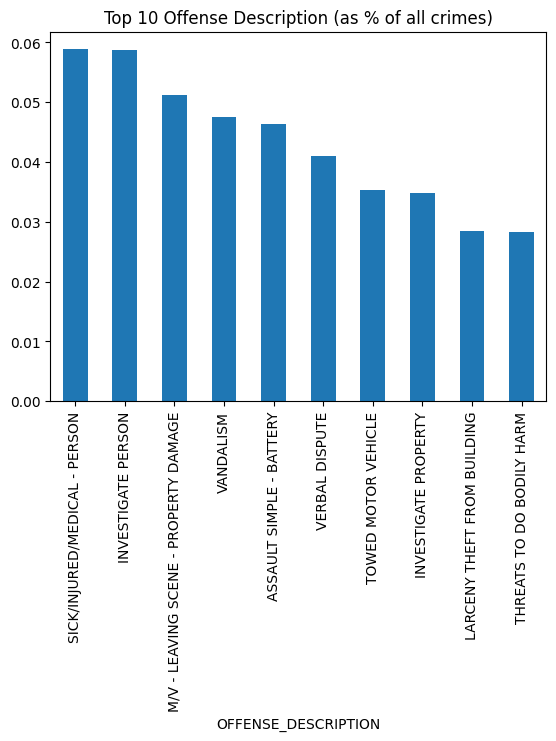

In [ ]:
# Create a bar chart of the Top 10 Offense Descriptions as a % of total crimes
data=crime.OFFENSE_DESCRIPTION.value_counts()[:10]
display(data/crime.shape[0])
(data/crime.shape[0]).plot(kind="bar") 
plt.title("Top 10 Offense Description (as % of all crimes)")

Text(0.5, 1.0, 'Number of crimes')

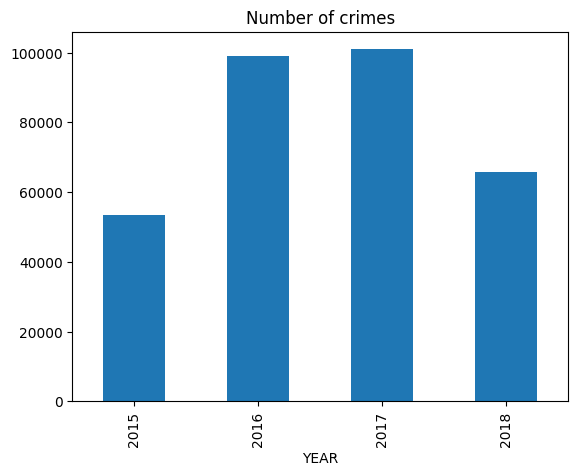

In [85]:
# In which year were the most crimes committed?
crime.groupby("YEAR").count()["INCIDENT_NUMBER"].plot(kind="bar")
plt.title("Number of crimes")

In [87]:
crime.groupby("YEAR").count()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
YEAR,,,,,,,,,,,,,,,,
2015,53371,53371,53371,53371,53243,53371,185,53371,53371,53371,53371,53370,52089,51190,51190,53371
2016,99110,99110,99110,99110,98593,99110,279,99110,99110,99110,99110,99076,93395,92339,92339,99110
2017,100884,100884,100884,100884,100308,100884,370,100884,100884,100884,100884,100845,98153,94059,94059,100884
2018,65685,65685,65685,65685,65141,65685,185,65685,65685,65685,65685,65669,64542,61464,61464,65685


DAY_OF_WEEK
Friday       48489
Wednesday    46727
Thursday     46655
             ...  
Monday       45674
Saturday     44816
Sunday       40313
Name: INCIDENT_NUMBER, Length: 7, dtype: int64

<Axes: xlabel='DAY_OF_WEEK'>

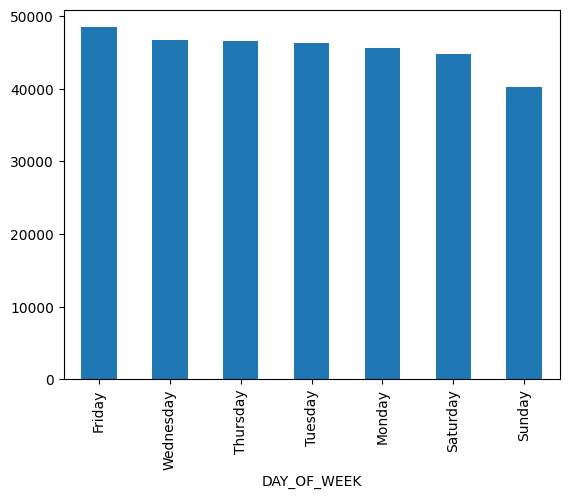

In [122]:
# Are there more crimes committed on specific days?
display(crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False))
crime.groupby("DAY_OF_WEEK").count()["INCIDENT_NUMBER"].sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='HOUR'>

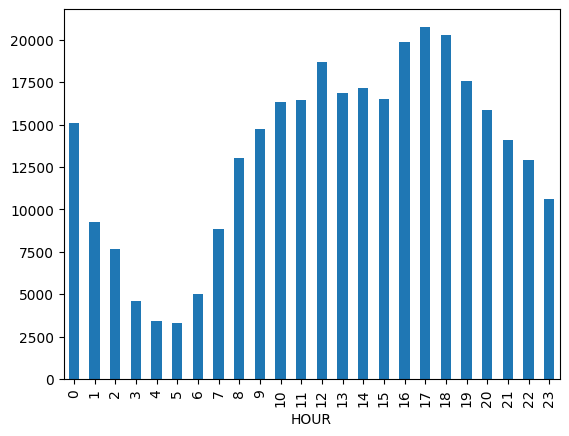

In [91]:
# Are there more crimes during specific hours?
crime.groupby("HOUR").count()["INCIDENT_NUMBER"].plot(kind="bar")


<Axes: ylabel='HOUR'>

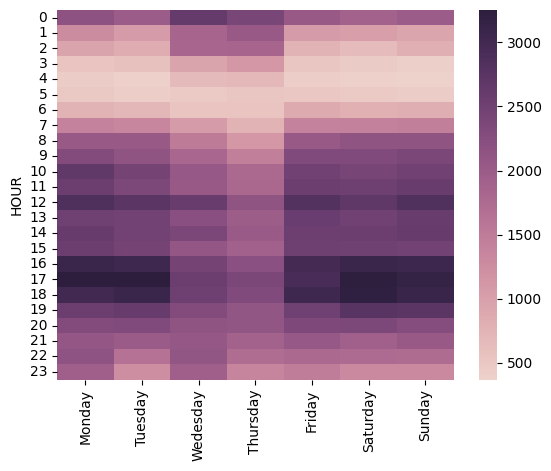

In [ ]:
# On what days and during which hours are the most crimes committed?
week_and_hour=crime.groupby(["HOUR", "DAY_OF_WEEK"]).count()["INCIDENT_NUMBER"].unstack()
# unstack(): long format trun into wide format 
# Will become a dataframe
week_and_hour.columns=["Monday", "Tuesday", "Wedesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True))

In [143]:
# If the value is less than the average crime per month, highlight the value in blue
avg_crime=crime.groupby(["YEAR", "MONTH"]).count()["INCIDENT_NUMBER"].mean()
print("The average number of crime is " + str(avg_crime))
year_and_month=crime.groupby(["MONTH", "YEAR"]).count()["INCIDENT_NUMBER"].unstack()
# year_and_month
def style_negative(v, props=""):
    return props if v < avg_crime else None
s2 = year_and_month.style \
      .applymap(style_negative, props="color:blue;") \
      .applymap(lambda v: "opacity:20%;" if (v < 0.3) and (v > -0.3) else None)
s2

The average number of crime is 7976.25


/var/folders/xv/qxtlfcy55r3g7nmpy7vypsmr0000gn/T/ipykernel_24537/1712513427.py:9: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(style_negative, props="color:blue;") \
/var/folders/xv/qxtlfcy55r3g7nmpy7vypsmr0000gn/T/ipykernel_24537/1712513427.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda v: "opacity:20%;" if (v < 0.3) and (v > -0.3) else None)


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [ ]:
# Use apply to highlight the maximum in a column in darkgreen 
# np.where(condition, value_if_true, value_if_false)
def highlight_max(s, props=""):
    return np.where(s==np.nanmax(s.values), props, "")
s2.apply(highlight_max, props="color:white;background-color:darkgreen", axis=0)

YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


<Axes: xlabel='YEAR', ylabel='DISTRICT'>

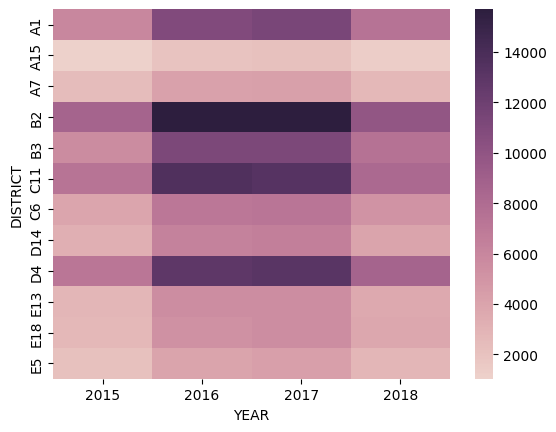

In [144]:
# In which districts were the most crimes committed on yearly basis?
district_and_year=crime.groupby(["DISTRICT", "YEAR"]).count()["INCIDENT_NUMBER"].unstack()
sns.heatmap(district_and_year, cmap=sns.cubehelix_palette(as_cmap=True))

In [147]:
# If the value is less than the average crime per district per year, highlight the value in blue
avg_crime_district = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].mean()
print("The average crime per district per year is: " + str(avg_crime_district))

def style_negative(v, props=''):
    return props if v < avg_crime_district else None
s3 = district_and_year.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s3

The average crime per district per year is: 6610.104166666667


/var/folders/xv/qxtlfcy55r3g7nmpy7vypsmr0000gn/T/ipykernel_24537/2089661200.py:7: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  s3 = district_and_year.style.applymap(style_negative, props='color:blue;')\
/var/folders/xv/qxtlfcy55r3g7nmpy7vypsmr0000gn/T/ipykernel_24537/2089661200.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)


YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


In [148]:
# Highlight the maximum value in each column with darkgreen
def highlight_max(s, props=""):
    return np.where(s==np.nanmax(s.values), props, "")
s3.apply(highlight_max, props="color:white;background-color:darkgreen", axis=0)

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601
